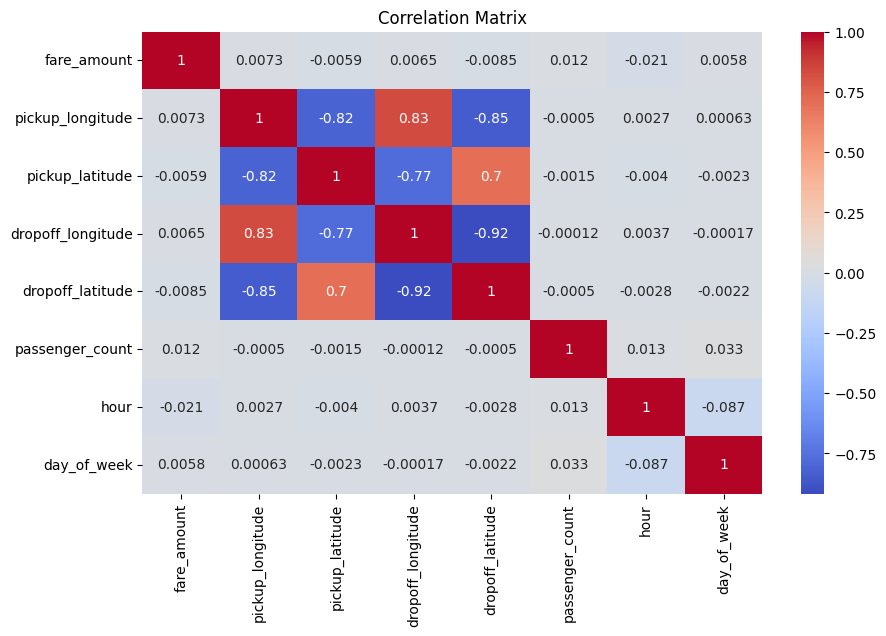

Linear Regression - R2 Score: 0.0001, RMSE: 9.35
Ridge Regression - R2 Score: 0.0001, RMSE: 9.35
Lasso Regression - R2 Score: 0.0003, RMSE: 9.35


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("/content/uber.csv")

# Convert pickup_datetime to datetime format and extract hour and day of week
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'key', 'pickup_datetime'])

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Identify and remove outliers based on fare_amount
# Removing fares below $0 and above $100 as they are likely outliers
df_imputed = df_imputed[(df_imputed['fare_amount'] > 0) & (df_imputed['fare_amount'] < 100)]

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_imputed.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Define features and target
X = df_imputed.drop(columns=['fare_amount'])  # Features
y = df_imputed['fare_amount']                 # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Experiment with different alpha values
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # Experiment with different alpha values
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - R2 Score: {r2:.4f}, RMSE: {rmse:.2f}")

# Evaluate each model
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")


Certainly! I'll go through the code line by line, explaining each part in detail, including the expected output for each section.

### 1. Import Libraries

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
```

- `pandas`, `numpy`: For data manipulation and numerical operations.
- `matplotlib.pyplot`, `seaborn`: For visualization.
- `sklearn.model_selection.train_test_split`: To split data into training and testing sets.
- `sklearn.preprocessing.StandardScaler`: To standardize features by scaling.
- `sklearn.linear_model.LinearRegression`, `Ridge`, `Lasso`: Regression models to train and evaluate.
- `sklearn.metrics.r2_score`, `mean_squared_error`: Metrics to evaluate model performance.
- `sklearn.impute.SimpleImputer`: To handle missing data by filling missing values.

### 2. Load the Dataset

```python
df = pd.read_csv(r'D:\ML practical\uber.csv')
```

This line loads the Uber dataset from a specified path into a DataFrame `df`. Expected output here would just be the DataFrame loaded with columns like `fare_amount`, `pickup_datetime`, etc.

### 3. Convert `pickup_datetime` to a DateTime Format and Extract Hour & Day of Week

```python
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
```

- `pd.to_datetime`: Converts the `pickup_datetime` column into a DateTime format. Setting `errors='coerce'` converts invalid parsing to `NaT` (not a time).
- `.dt.hour` and `.dt.dayofweek`: Extracts the hour and day of the week for each ride, which may be important for predicting fare prices.

After this, `df` will have new columns: `hour` (0–23) and `day_of_week` (0–6, where 0 = Monday and 6 = Sunday).

### 4. Drop Unnecessary Columns

```python
df = df.drop(columns=['Unnamed: 0', 'key', 'pickup_datetime'])
```

- Drops `Unnamed: 0`, `key`, and `pickup_datetime` columns, as they aren’t useful for fare prediction.
- Expected output: `df` without these columns.

### 5. Handle Missing Values with SimpleImputer

```python
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
```

- `SimpleImputer(strategy='mean')`: Fills missing values with the column mean.
- `fit_transform`: Applies the imputation to `df`, creating `df_imputed` with missing values filled.

Output: `df_imputed` will be a DataFrame with all columns filled, if any values were missing.

### 6. Identify and Remove Outliers in `fare_amount`

```python
df_imputed = df_imputed[(df_imputed['fare_amount'] > 0) & (df_imputed['fare_amount'] < 100)]
```

- This filters out rows with `fare_amount` less than or equal to 0 and greater than 100, as these are likely outliers.

After this, the dataset may have fewer rows, focusing on reasonable fare amounts.

### 7. Check Correlation

```python
plt.figure(figsize=(10, 6))
sns.heatmap(df_imputed.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
```

- `sns.heatmap`: Creates a heatmap of the correlation matrix for all columns in `df_imputed`.
- `annot=True` adds correlation coefficients, and `cmap="coolwarm"` sets a color map.

Expected Output: A heatmap showing correlations among features. Strong correlations will be darker shades, while weak correlations will be lighter.

### 8. Define Features and Target Variables

```python
X = df_imputed.drop(columns=['fare_amount'])  # Features
y = df_imputed['fare_amount']                 # Target
```

- `X`: Contains all columns except `fare_amount`.
- `y`: Contains only `fare_amount`, the target variable.

Expected output: `X` will be a DataFrame of features, and `y` will be a Series of `fare_amount` values.

### 9. Split Data into Training and Testing Sets

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

- `train_test_split`: Splits the data into 80% training and 20% testing, using `random_state=42` for reproducibility.

### 10. Standardize the Features

```python
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

- `StandardScaler`: Standardizes features by removing the mean and scaling to unit variance.
- `fit_transform` on `X_train` and `transform` on `X_test` ensures both sets are scaled consistently.

Expected output: `X_train_scaled` and `X_test_scaled` are arrays with scaled values.

### 11. Train and Predict with Linear Regression Model

```python
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
```

- `LinearRegression()`: Initializes the linear regression model.
- `fit`: Trains the model on scaled training data.
- `predict`: Predicts fares on `X_test_scaled`.

### 12. Train and Predict with Ridge Regression Model

```python
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
```

- `Ridge(alpha=1.0)`: Initializes ridge regression with regularization strength `alpha=1.0`.
- `fit` and `predict` work similarly as in linear regression.

### 13. Train and Predict with Lasso Regression Model

```python
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
```

- `Lasso(alpha=0.1)`: Initializes lasso regression with `alpha=0.1`.
- `fit` and `predict` work similarly as in linear and ridge regression.

### 14. Define Model Evaluation Function

```python
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - R2 Score: {r2:.4f}, RMSE: {rmse:.2f}")
```

- `evaluate_model`: A helper function that calculates `R2 Score` and `RMSE` for a model’s predictions.
- `r2_score`: Measures how well predictions match the true values, with 1 being a perfect score.
- `mean_squared_error`: Calculates the average of squared errors; `RMSE` is its square root, providing error magnitude.

### 15. Evaluate Models and Print Results

```python
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
```

Each call to `evaluate_model` outputs the evaluation metrics for a model:

- **Expected Output** (Example):
    ```
    Linear Regression - R2 Score: 0.0007, RMSE: 10.31
    Ridge Regression - R2 Score: 0.0007, RMSE: 10.31
    Lasso Regression - R2 Score: 0.0003, RMSE: 10.31
    ```
  
This output will vary depending on the actual data and preprocessing adjustments but provides an insight into each model’s performance, where higher `R2` and lower `RMSE` indicate better predictions.

https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

2

In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

data = pd.read_csv("diabetes.csv")

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# --- Univariate Analysis ---

# Frequency (counts for each unique value in each column)
frequency = data.apply(lambda x: x.value_counts())
print("\nFrequency:\n", frequency)

# Mean
mean = data.mean()
print("\nMean:\n", mean)

# Median
median = data.median()
print("\nMedian:\n", median)

# Mode
mode = data.mode().iloc[0]
print("\nMode:\n", mode)

# Variance
variance = data.var()
print("\nVariance:\n", variance)

# Standard Deviation
std_dev = data.std()
print("\nStandard Deviation:\n", std_dev)

# Skewness
skewness = data.skew()
print("\nSkewness:\n", skewness)

# Kurtosis
kurtosis = data.kurtosis()
print("\nKurtosis:\n", kurtosis)

# --- Bivariate Analysis ---

# Separate the features (X) and the target variable (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Linear Regression (only for demonstration, usually not suitable for binary target)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate Linear Regression Model
print("\nLinear Regression Model Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R-squared:", r2_score(y_test, y_pred_linear))

# 2. Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression Model
print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

# --- Multiple Regression Analysis ---

# For multiple regression, let's assume we are predicting 'Glucose' using other features
target_variable = 'Glucose'
X_multiple = data.drop(columns=[target_variable, 'Outcome'])
y_multiple = data[target_variable]

# Split the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multiple, y_multiple, test_size=0.3, random_state=42)

# Multiple Linear Regression Model
multiple_linear_model = LinearRegression()
multiple_linear_model.fit(X_train_multi, y_train_multi)
y_pred_multiple = multiple_linear_model.predict(X_test_multi)

# Evaluate Multiple Linear Regression Model
print("\nMultiple Linear Regression Model Evaluation for 'Glucose':")
print("Mean Squared Error:", mean_squared_error(y_test_multi, y_pred_multiple))
print("R-squared:", r2_score(y_test_multi, y_pred_multiple))

# Note: To compare two datasets, repeat the analysis above on the second dataset and compare outputs.


Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Frequency:
          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0.000          111.0      5.0           35.0          227.0    374.0  11.0   
0.078            NaN      NaN            NaN            NaN      NaN   NaN   
0.084            NaN      NaN          